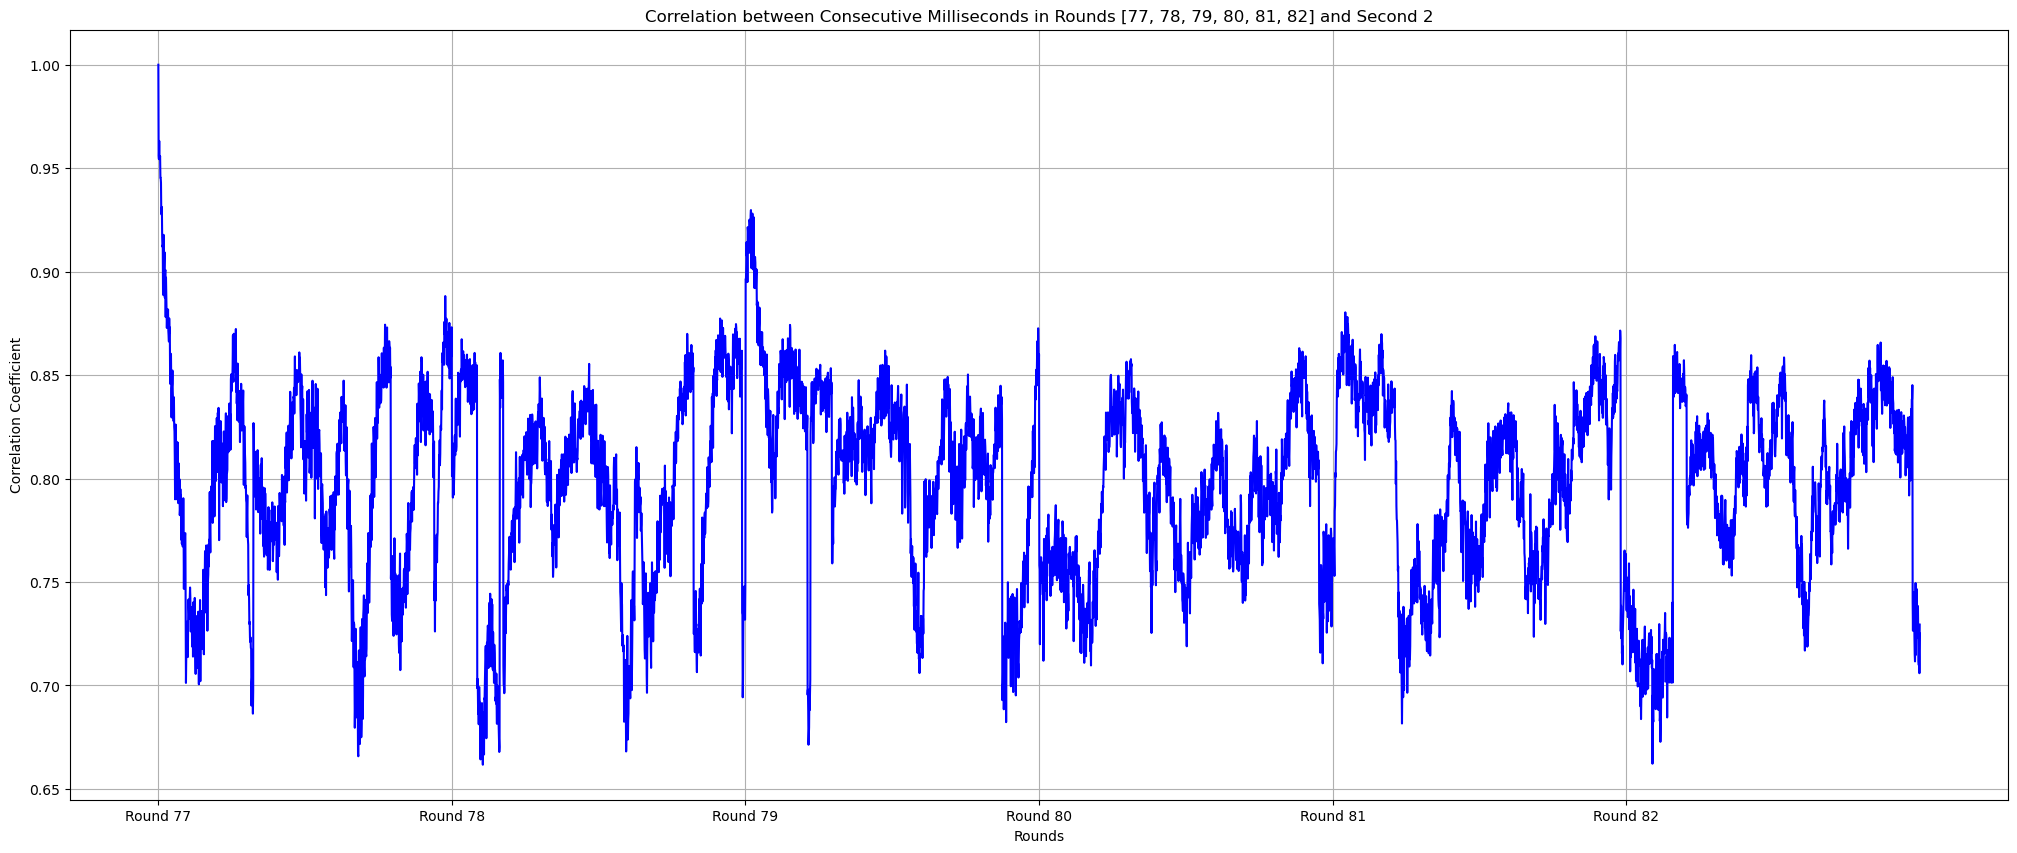

In [ ]:
#%%

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import os

# Informationen
load_path = "/media/student/SEW/Bearbeitet_Data/Rx1/Tag1_Scenario1_AGVHorizontal/"
round_numbers = [77,78,79,80,81,82]
second = 2

# die Daten für bestimmte Round und Zeit herunterladen
data_db = []
round_lengths = [] 
for round_number in round_numbers:
    filename = f"Round_{round_number}_AP_1_RF_0_Sec_{second}.mat"
    full_filename = os.path.join(load_path, filename)
    if os.path.exists(full_filename):
      mat = scipy.io.loadmat(full_filename)
      cirs_data = mat["cirs"]
      data_db.append(10 * np.log10(np.abs(cirs_data)))
      round_lengths.append(cirs_data.shape[1])
    else:
       print(f"File {filename} not found.")

# concatenate data
data_db = np.concatenate(data_db, axis=1)

# Correlation
correlations = []
cnt = 0
for i in range(data_db.shape[1] - 1):
    if cnt ==0:
      data_first_millisecond = data_db[:,0]
      cnt =1
    data_current_millisecond = data_db[:,i]
 
    correlation = np.corrcoef(data_first_millisecond,data_current_millisecond)
    
    correlations.append(correlation[0][1])
    #print(f"Correlation im jeden Millisecond",data_db,correlations)

# Figur
plt.figure(figsize=(25, 10))
plt.plot(range(1, len(correlations) + 1), correlations, color='b')
plt.xlabel("Rounds")
plt.ylabel("Correlation Coefficient")
plt.title(f"Correlation between Consecutive Milliseconds in Rounds {round_numbers} and Second {second}")


# customize x-axis ticks
x_ticks = np.cumsum([0] + round_lengths)[:-1]
x_tick_labels = [f"Round {round_number}" for round_number in round_numbers]
plt.xticks(x_ticks, x_tick_labels)

plt.grid(True)
plt.show()